# EXPLORE DATA ANALYSIS

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Kiểm tra tập dữ liệu

In [114]:
def show_info(data, data_file = 'train', is_matrix_transpose = False):
    # Kích thước cơ bản
    print('Kích thước dữ liệu tập {} là: {} \t Số lượng mẫu: {} \t Số lượng thuộc tính: {}\n'.format(data_file, data.shape, data.shape[0], data.shape[1]))
    # Các attribute (key)
    print('Số lượng cột {}  \nCác cột bao gồm: {}'.format(len(data.columns) ,data.columns))

Đọc dữ liệu từ file `train.csv` vào DataFrame `tweet`

In [115]:
tweet = pd.read_csv('./dataset/train.csv')
# print(f'Kích thước của dữ liệu tập train là: {tweet.shape}.')
show_info(tweet)

Kích thước dữ liệu tập train là: (7613, 5) 	 Số lượng mẫu: 7613 	 Số lượng thuộc tính: 5

Số lượng cột 5  
Các cột bao gồm: Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')


Trong tập dữ liệu (7613, 5) của tập train thì ta sẽ xem có bao nhiêu nhãn, và số lượng từng nhãn.

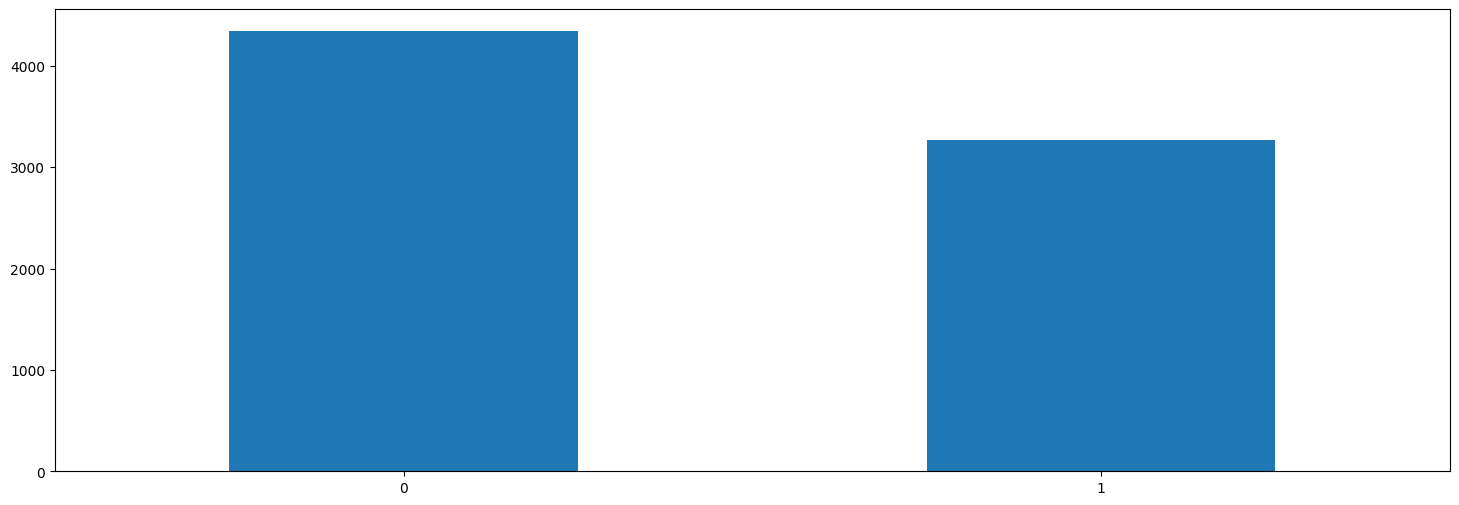

In [116]:
# plot -> label -> classification
tweet.target.value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.show()

**NHẬN XÉT:**
- Nhãn 0 mang nghĩa là không có thảm hoạ, nhãn 1 mang nghĩa là có thảm hoạ.
- Số lượng 2 nhãn khá cân bằng, nên có vẽ dữ liệu không bị bias.

Đọc dữ liệu từ file `test.csv` vào DataFrame `test`

In [117]:
test = pd.read_csv('./dataset/test.csv')
# print(f'Kích thước của dữ liệu tập train là: {test.shape}.')
show_info(test)

Kích thước dữ liệu tập train là: (3263, 4) 	 Số lượng mẫu: 3263 	 Số lượng thuộc tính: 4

Số lượng cột 4  
Các cột bao gồm: Index(['id', 'keyword', 'location', 'text'], dtype='object')


## 2. Kiểm tra Missing Value

#### 2.1. Trong tập train

In [118]:
print(f'Tỉ lệ mất mát dữ liệu của tập train là: {tweet.isna().sum().sum() / np.prod(tweet.shape)}')

Tỉ lệ mất mát dữ liệu của tập train là: 0.06814659135688952


In [119]:
print('Tỷ lệ mất mát dữ liệu của mỗi cột trong tập train là')
np.round(tweet.isna().sum(axis = 0) / tweet.shape[0], 2)

Tỷ lệ mất mát dữ liệu của mỗi cột trong tập train là


id          0.00
keyword     0.01
location    0.33
text        0.00
target      0.00
dtype: float64

#### 2.2. Trong tập test

In [120]:
print(f'Tỉ lệ mất mát dữ liệu của tập test là: {test.isna().sum().sum() / np.prod(test.shape)}')

Tỉ lệ mất mát dữ liệu của tập test là: 0.08665338645418327


In [121]:
print('Tỷ lệ mất mát dữ liệu của mỗi cột trong tập test là')
np.round(test.isna().sum(axis = 0) / test.shape[0], 2)

Tỷ lệ mất mát dữ liệu của mỗi cột trong tập test là


id          0.00
keyword     0.01
location    0.34
text        0.00
dtype: float64

## 3. Kiểm tra các dòng bị trùng 

In [122]:
print(f'Số lượng các dòng bị trùng lặp trong tập train là: {tweet.duplicated().sum()}.')

Số lượng các dòng bị trùng lặp trong tập train là: 0.


In [123]:
print(f'Số lượng các dòng bị trùng lặp trong tập test là: {tweet.duplicated().sum()}.')

Số lượng các dòng bị trùng lặp trong tập test là: 0.


## 4. Khám phá dữ liệu

#### 4.1. Chiều dài của một bài đăng

Thêm một cột `length` là chiều dài của cột `text` vào cuối dataframe `tweet`.

In [124]:
def length(text):
    return len(text)
# new attribute 'length' in train 
tweet['length'] = tweet['text'].apply(length)
show_info(tweet)

Kích thước dữ liệu tập train là: (7613, 6) 	 Số lượng mẫu: 7613 	 Số lượng thuộc tính: 6

Số lượng cột 6  
Các cột bao gồm: Index(['id', 'keyword', 'location', 'text', 'target', 'length'], dtype='object')


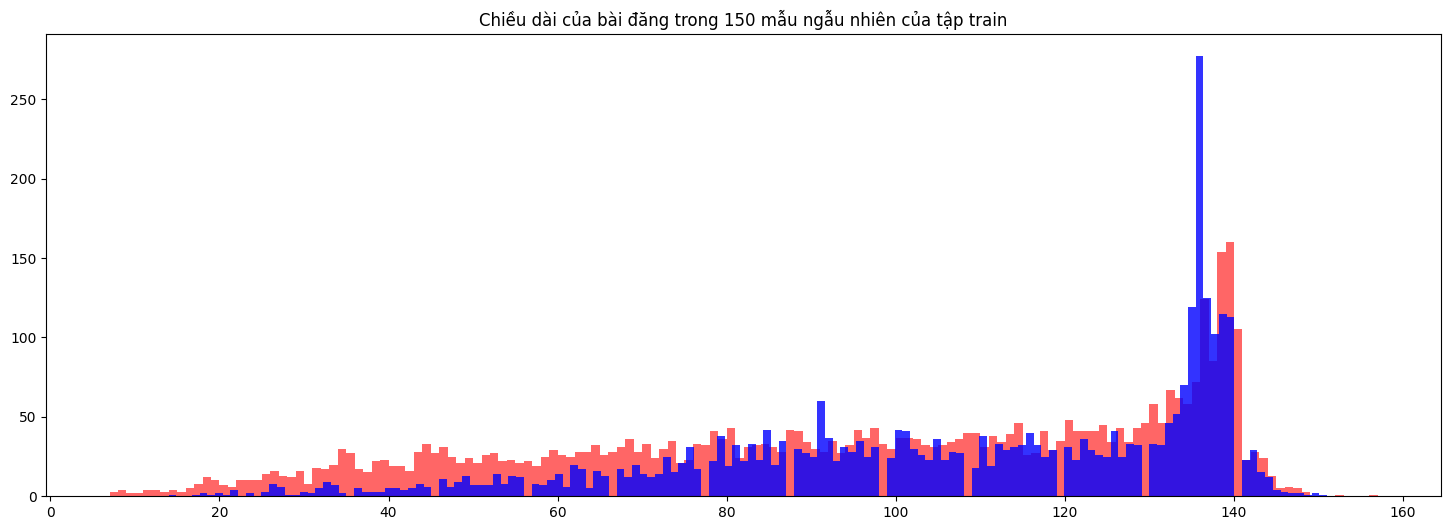

In [125]:
plt.rcParams['figure.figsize'] = (18.0, 6.0)
bins = 150
plt.title("Chiều dài của bài đăng trong 150 mẫu ngẫu nhiên của tập train")
plt.hist(tweet[tweet['target'] == 0]['length'], alpha=0.6, bins=bins, label='Not', color='red')
plt.hist(tweet[tweet['target'] == 1]['length'], alpha=0.8, bins=bins, label='Real', color='blue')
plt.show()

**NHẬN XÉT:** 
- Chú thích: Màu đỏ mang nhãn là không thảm hoạ (0), màu xanh mang nghĩa là thảm hoạ (1).
- Với khoảng 150 mẫu của mỗi tập thì ta có thể thấy là nếu so về kích thước, chiều dài của bài đăng thì ta không thể kết luận là có xảy ra thảm hoạ hay không.

#### 4.2. Số từ trong một bài đăng

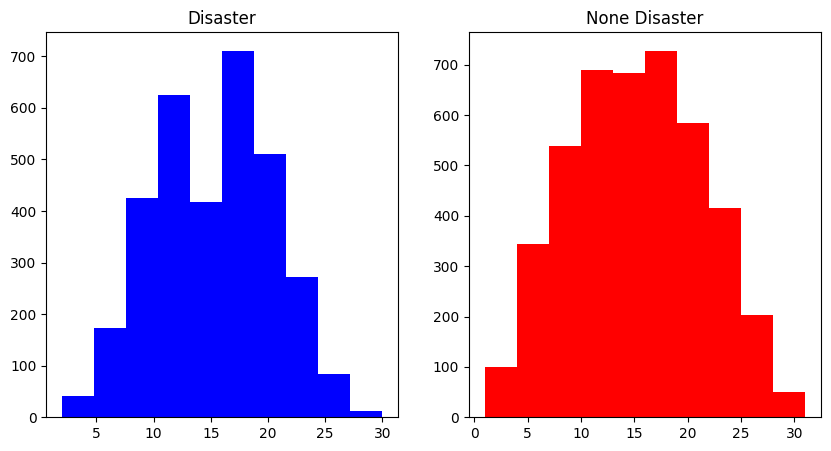

In [126]:
# number of words
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
tweet_len = tweet[tweet['target'] == 1]['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='blue')
ax1.title.set_text('Disaster')


tweet_len = tweet[tweet['target'] == 0]['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len, color='red')
ax2.title.set_text('None Disaster')
plt.show()

**NHẬN XÉT:** Có một sự khác nhau nhẹ giữa sự phân bố của số từ trong một bài đăng giữa 2 nhãn.

#### 4.3. Chiều dài trung bình của một bài đăng

Lấy một ví dụ dễ hiểu: 'I love you so much'

- Chiều dài của mỗi từ lần lược là: len_word = [1, 4, 3, 2, 4]

- Sau đó ta tính mean(len_word) = 2.8

Do đó, ta nói 2.8 là chiều dài trung bình của bài đăng.

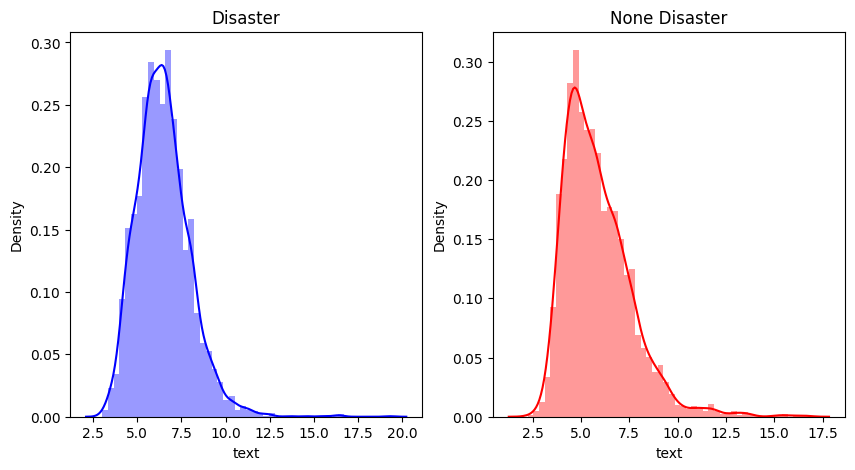

In [127]:
# average length in a text
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
word = tweet[tweet['target'] == 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
true_word_map = word.map(lambda x: np.mean(x))
sns.distplot(a = true_word_map,
             ax=ax1, color='blue')
ax1.title.set_text('Disaster')

word = tweet[tweet['target'] == 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
false_word_map = word.map(lambda x: np.mean(x))
sns.distplot(a = false_word_map,
             ax=ax2, color='red')
ax2.title.set_text('None Disaster')
plt.show()

**NHẬN XÉT:** Cả 2 biểu đồ có độ tương đồng cao, tuy nhiên độ dài trung bình một bài đăng của Disater có một phần nào đó dài hơn là None Disater.

#### 4.4. Phân tích từ (word) trong các bài đăng

In [128]:
from nltk.tokenize import word_tokenize
from collections import defaultdict, Counter
from sklearn.feature_extraction.text import CountVectorizer

import string

In [129]:
from nltk.corpus import stopwords
# set english
stop = set(stopwords.words('english'))

In [130]:
# create corpus to get only corpus
def create_corpus(target):
    corpus = []
    
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

def create_corpus_df(tweet, target):
    corpus = []
    for x in tweet[tweet['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

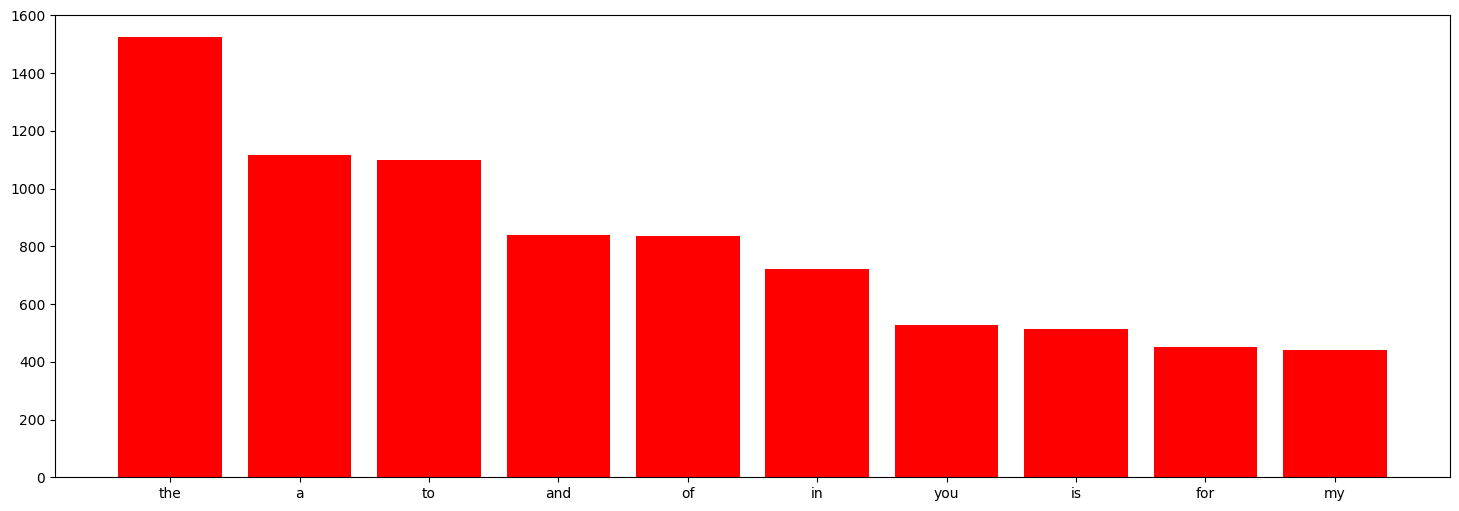

In [131]:
# create corpus 0 => not
corpus = create_corpus(0)
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

# then plot stop words 
plt.rcParams['figure.figsize'] = (18.0, 6.0)
x, y = zip(*top)
plt.bar(x, y, color = 'red')
plt.show()

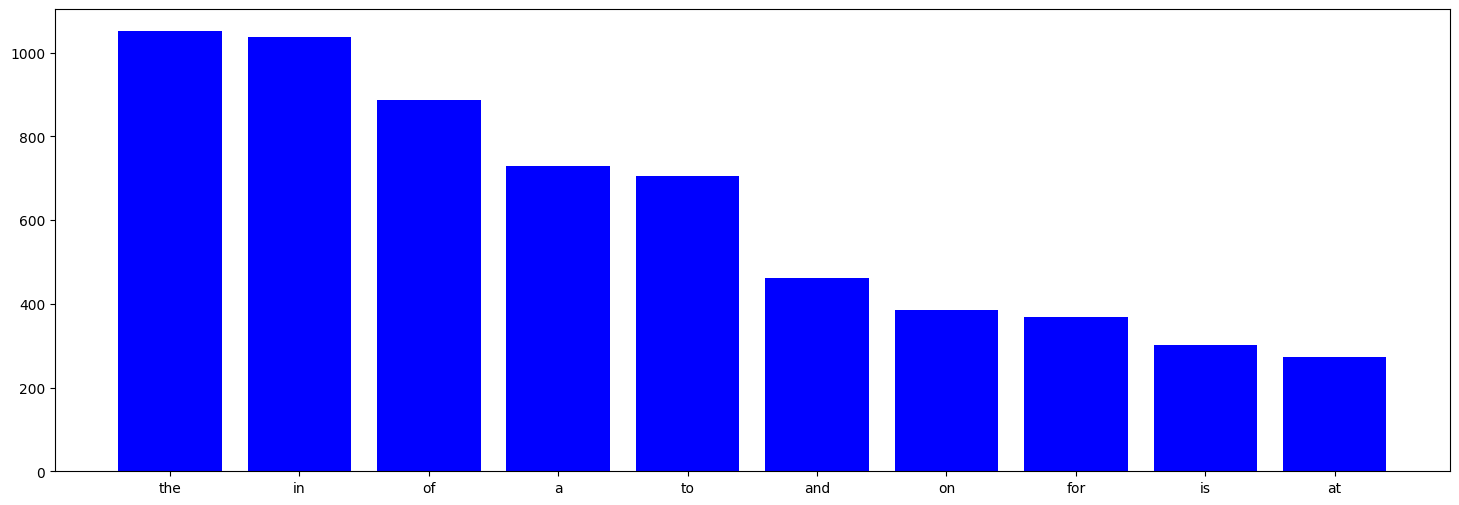

In [132]:
# create corpus 1 => real
corpus = create_corpus(1)

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word] += 1

top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]

plt.rcParams['figure.figsize'] = (18.0, 6.0)
x, y = zip(*top)
plt.bar(x, y, color = 'blue')
plt.show()

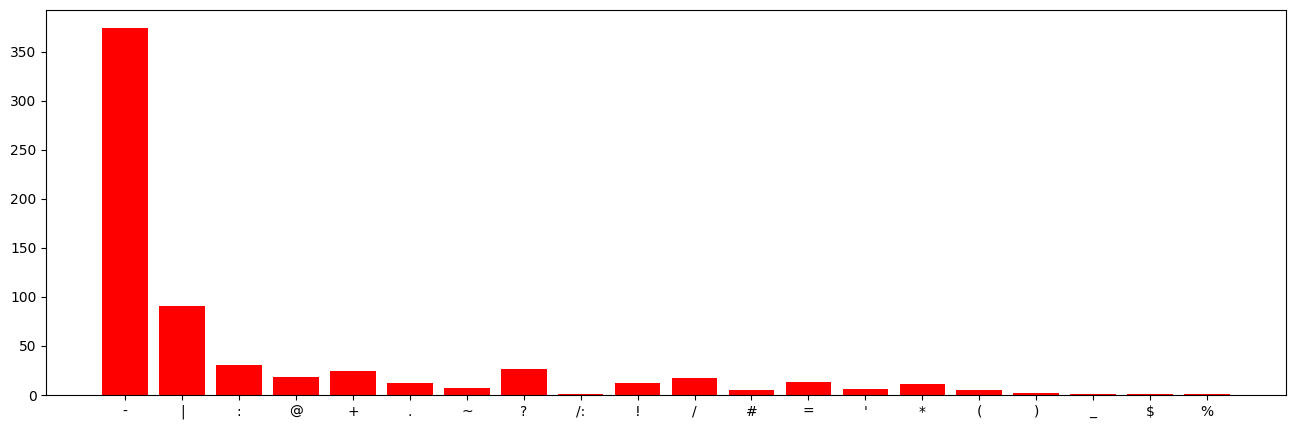

In [133]:
# punctuation 0 => not
plt.figure(figsize=(16, 5))
corpus = create_corpus(0)
dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i] += 1
x, y = zip(*dic.items())
plt.bar(x, y, color = 'red')
plt.show()

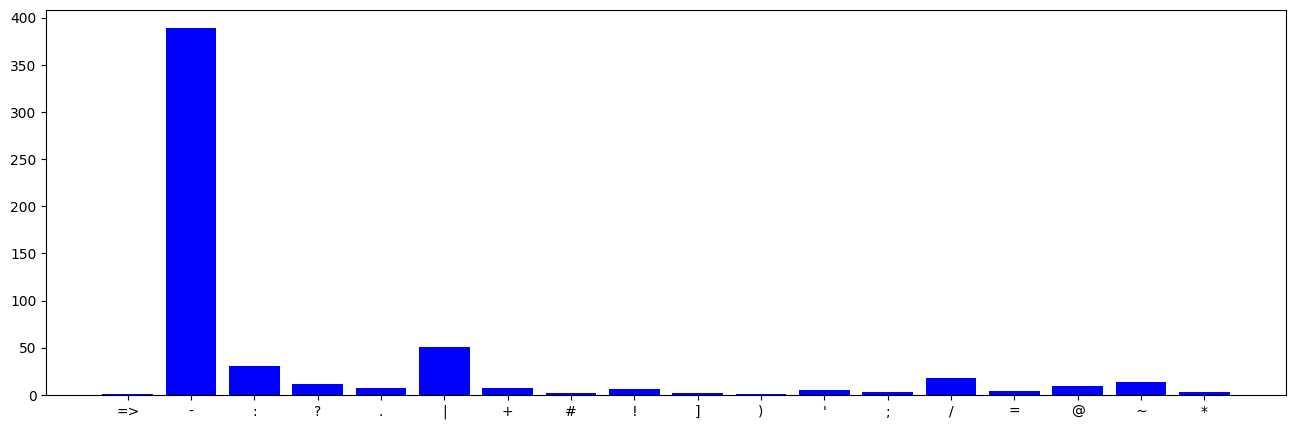

In [134]:
# punctuation 1 => Real
plt.figure(figsize=(16, 5))
corpus = create_corpus(1)
dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i] += 1

x, y = zip(*dic.items())
plt.bar(x, y, color = 'blue')
plt.show()

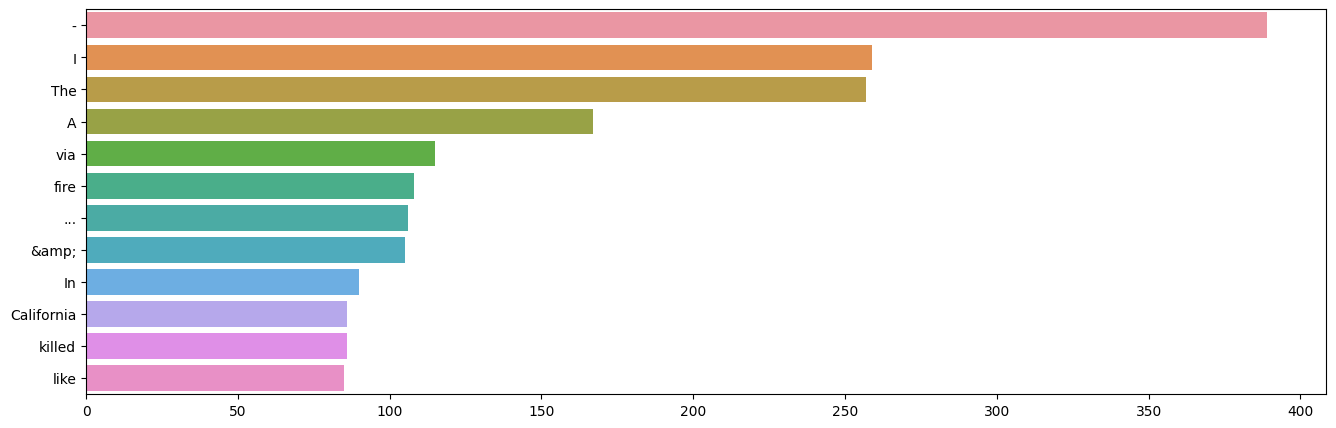

In [135]:
# common words
plt.figure(figsize=(16, 5))
counter = Counter(corpus)
most = counter.most_common()
x = []
y = []
for word, count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
sns.barplot(x=y, y=x)
plt.show()

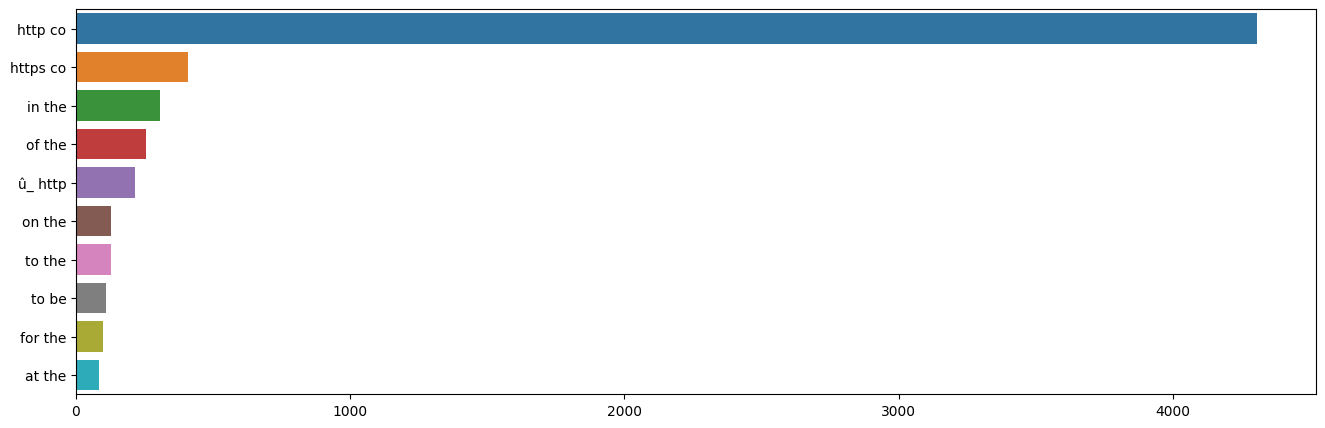

In [136]:
# N-gram analysis 多变量分析
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

plt.figure(figsize=(16, 5))
top_tweet_bigrams = get_top_tweet_bigrams(tweet['text'])[:10]
x, y = map(list, zip(*top_tweet_bigrams))
sns.barplot(x=y, y=x)
plt.show()

In [137]:
from wordcloud import WordCloud

In [139]:
df = pd.concat([tweet, test])
df.shape

(10876, 6)

In [140]:
corpus_new1 = create_corpus_df(df, 1)
len(corpus_new1)

49613

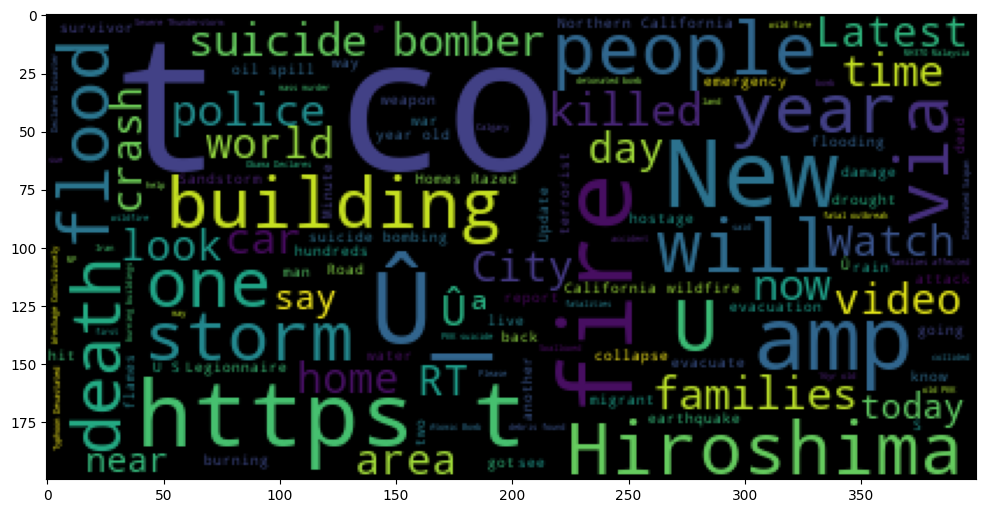

In [141]:
plt.figure(figsize=(12, 8))
word_cloud = WordCloud(
    background_color='black',
    max_font_size=80
).generate(' '.join(corpus_new1))
plt.imshow(word_cloud)
plt.show()

In [142]:
corpus_new0 = create_corpus_df(df, 0)
len(corpus_new0)

63848